In [24]:
# imports
# get data
# split, test train validation
# preprocessing
# build model
# compile
# run
# evaluate

# IMPORTS

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

# GET DATA + VISUALIZATION

In [26]:
x = np.linspace(0,10)
y = np.array([10*n + np.random.normal(-20,8) for n in x])
line = np.array([10*n + -20 for n in x])

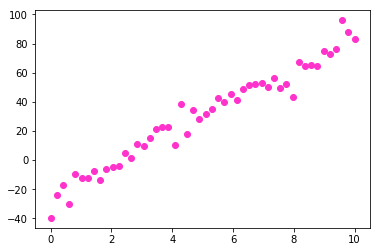

In [27]:
plt.scatter(x, y, c='#ff33cc')

In [28]:
X = x.reshape(50,1)
X.shape

(50, 1)

# TEST/TRAIN SPLIT

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# PREPROCESSING

In [30]:
# none

# BUILD MODEL & RUN

In [31]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='linear'))
model.summary()
# --------------------------------------------- #
rms = keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse', optimizer=rms, metrics=['mse'])
history = model.fit(X_train, y_train, batch_size=5, epochs=10_000, verbose=0, shuffle=True, validation_split=0.3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# PLOT VALIDATION LOSS

In [32]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

In [33]:
history.history['val_mean_squared_error'][:3]

[1627.1140034993489, 1623.6715596516926, 1620.712870279948]

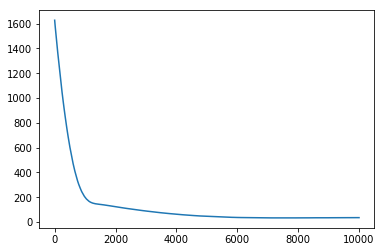

In [34]:
plt.plot(history.history['val_mean_squared_error'])

# GET WEIGHTS, TEST, PREDICT

In [35]:
slope = model.get_weights()[0][0][0]

In [36]:
intercept = model.get_weights()[1][0]

In [37]:
line_hat = [n*slope + intercept for n in X_test]

In [38]:
y_hat = model.predict(X_test)

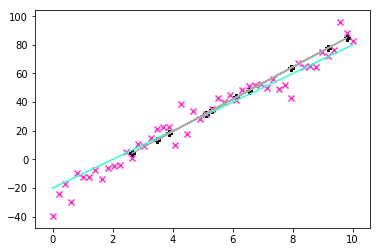

In [39]:
fig, ax = plt.subplots()
plt.scatter(X_test, y_hat, c='#000000', marker='P')
plt.scatter(x, y, c='#ff33cc', marker='x')
plt.plot(x, line, c='#33ffcc')
plt.plot(X_test, line_hat, c='#aaaaaa')

In [40]:
print("f(x) = {:.2f}x + {:.2f}".format(10, -20))
print("f(x) = {:.2f}x + {:.2f}".format(slope, intercept))

f(x) = 10.00x + -20.00
f(x) = 11.25x + -25.53


In [41]:
r2_score(y_test, y_hat)

0.8973135002603441

# Comparing to LinearRegression

In [42]:
m = LinearRegression().fit(X_train, y_train)

In [43]:
m.coef_

array([11.18187469])

In [44]:
m.intercept_

-25.789183649233202

In [45]:
m.score(X_test, y_test)

0.9006871248950523

# Custom model

In [60]:
# y      = data
# x      = data
# m, b   = initially given, but need to be updated
# y_hat  = mx + b
# loss   = sum((y - y_hat) ** 2) # vectorized, for all x, y
# dC/dm  = -2x (y - y_hat)       # vectorized, for all x, y
# dC/db  = -2 (y - y_hat)        # vectorized, for all x, y
# alpha  = given
# epochs = given

In [181]:
class SingleNeuron:
    def __init__(self, epochs, alpha):
        self.epochs = epochs
        self.alpha = alpha
        self.m = 10 # np.random.random()
        self.b = -20 # np.random.random()
    def fit(self, X, y):
        N = y.shape[0]
        y = y.reshape(1, N)
        #for e in range(self.epochs):

        y_hat = (self.m * X) + self.b
        y_hat = y_hat.reshape(1, N)

        a = y - y_hat
        b = -2 * X
            
        return y, y_hat, X    
            
            
            
            
            
            

In [183]:
model = SingleNeuron(1, 1)
model.__dict__
y1, y2, x1 = model.fit(X_train[:2], y_train[:2])

In [184]:
y1

array([[ 4.90265806, -9.34805095]])

In [185]:
y2

array([[  4.48979592, -11.83673469]])

In [186]:
x1

array([[2.44897959],
       [0.81632653]])

In [187]:
(4.90 - 4.48) * -2 * 2.44

-2.0495999999999994

In [188]:
(-9.34 - (-11.83)) * -2 * 0.81

-4.0338

In [128]:
epochs = 1
N      = y_train.shape[0]
alpha  = 0.00001
m      = 10
b      = -20
f_x    = lambda x: (m * x) + b

for e in range(epochs):
    # turn 2xN into 1xN
    y_hat = f_x(X_train).flatten()
    loss = ((y_train - y_hat) ** 2).sum()

    a = (y_train[:2] - y_hat[:2])
    b = (-2 * X_train[:2])
    print(a)
    print('----')
    print(b)
    print('----')
    print(a@b)
    #print(b@a)
        
        
        #     db = (alpha * (y_train - y_hat(X_train)) * (-2)).sum()
#     print("loss: {:.2f} m: {:.2f} b: {:.2f} dm: {:.2f} db: {:.2f}".format(loss, m, b, dm, db))
#     m -= dm
#     b -= db

[0.41286214 2.48868374]
----
[[-4.89795918]
 [-1.63265306]]
----
[-6.08533903]


In [131]:
np.dot(b,a.reshape(1,2))

array([[ -2.0221819 , -12.18947138],
       [ -0.67406063,  -4.06315713]])

In [110]:
z = y_hat(X_train[:2])

In [111]:
z

array([[  4.48979592],
       [-11.83673469]])

In [135]:
z.flatten()

array([  4.48979592, -11.83673469])

In [136]:
np.random.random()

0.1594505311863219